# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from L2.sga import SGA
from L2.mutation import reverse_sequence_mutation, transposition_mutation
from L2.replacement import mu_plus_lambda_replacement
from L2.genetic_operator import pmx

%matplotlib inline

## Input data

In [3]:
# kroa150

n = 150
print('Problem size: %d' % n)

coords = np.array([[ 1380.,   939.],
       [ 2848.,    96.],
       [ 3510.,  1671.],
       [  457.,   334.],
       [ 3888.,   666.],
       [  984.,   965.],
       [ 2721.,  1482.],
       [ 1286.,   525.],
       [ 2716.,  1432.],
       [  738.,  1325.],
       [ 1251.,  1832.],
       [ 2728.,  1698.],
       [ 3815.,   169.],
       [ 3683.,  1533.],
       [ 1247.,  1945.],
       [  123.,   862.],
       [ 1234.,  1946.],
       [  252.,  1240.],
       [  611.,   673.],
       [ 2576.,  1676.],
       [  928.,  1700.],
       [   53.,   857.],
       [ 1807.,  1711.],
       [  274.,  1420.],
       [ 2574.,   946.],
       [  178.,    24.],
       [ 2678.,  1825.],
       [ 1795.,   962.],
       [ 3384.,  1498.],
       [ 3520.,  1079.],
       [ 1256.,    61.],
       [ 1424.,  1728.],
       [ 3913.,   192.],
       [ 3085.,  1528.],
       [ 2573.,  1969.],
       [  463.,  1670.],
       [ 3875.,   598.],
       [  298.,  1513.],
       [ 3479.,   821.],
       [ 2542.,   236.],
       [ 3955.,  1743.],
       [ 1323.,   280.],
       [ 3447.,  1830.],
       [ 2936.,   337.],
       [ 1621.,  1830.],
       [ 3373.,  1646.],
       [ 1393.,  1368.],
       [ 3874.,  1318.],
       [  938.,   955.],
       [ 3022.,   474.],
       [ 2482.,  1183.],
       [ 3854.,   923.],
       [  376.,   825.],
       [ 2519.,   135.],
       [ 2945.,  1622.],
       [  953.,   268.],
       [ 2628.,  1479.],
       [ 2097.,   981.],
       [  890.,  1846.],
       [ 2139.,  1806.],
       [ 2421.,  1007.],
       [ 2290.,  1810.],
       [ 1115.,  1052.],
       [ 2588.,   302.],
       [  327.,   265.],
       [  241.,   341.],
       [ 1917.,   687.],
       [ 2991.,   792.],
       [ 2573.,   599.],
       [   19.,   674.],
       [ 3911.,  1673.],
       [  872.,  1559.],
       [ 2863.,   558.],
       [  929.,  1766.],
       [  839.,   620.],
       [ 3893.,   102.],
       [ 2178.,  1619.],
       [ 3822.,   899.],
       [  378.,  1048.],
       [ 1178.,   100.],
       [ 2599.,   901.],
       [ 3416.,   143.],
       [ 2961.,  1605.],
       [  611.,  1384.],
       [ 3113.,   885.],
       [ 2597.,  1830.],
       [ 2586.,  1286.],
       [  161.,   906.],
       [ 1429.,   134.],
       [  742.,  1025.],
       [ 1625.,  1651.],
       [ 1187.,   706.],
       [ 1787.,  1009.],
       [   22.,   987.],
       [ 3640.,    43.],
       [ 3756.,   882.],
       [  776.,   392.],
       [ 1724.,  1642.],
       [  198.,  1810.],
       [ 3950.,  1558.],
       [ 3477.,   949.],
       [   91.,  1732.],
       [ 3972.,   329.],
       [  198.,  1632.],
       [ 1806.,   733.],
       [  538.,  1023.],
       [ 3430.,  1088.],
       [ 2186.,   766.],
       [ 1513.,  1646.],
       [ 2143.,  1611.],
       [   53.,  1657.],
       [ 3404.,  1307.],
       [ 1034.,  1344.],
       [ 2823.,   376.],
       [ 3104.,  1931.],
       [ 3232.,   324.],
       [ 2790.,  1457.],
       [  374.,     9.],
       [  741.,   146.],
       [ 3083.,  1938.],
       [ 3502.,  1067.],
       [ 1280.,   237.],
       [ 3326.,  1846.],
       [  217.,    38.],
       [ 2503.,  1172.],
       [ 3527.,    41.],
       [  739.,  1850.],
       [ 3548.,  1999.],
       [   48.,   154.],
       [ 1419.,   872.],
       [ 1689.,  1223.],
       [ 3468.,  1404.],
       [ 1628.,   253.],
       [  382.,   872.],
       [ 3029.,  1242.],
       [ 3646.,  1758.],
       [  285.,  1029.],
       [ 1782.,    93.],
       [ 1067.,   371.],
       [ 2849.,  1214.],
       [  920.,  1835.],
       [ 1741.,   712.],
       [  876.,   220.],
       [ 2753.,   283.],
       [ 2609.,  1286.],
       [ 3941.,   258.],
       [ 3613.,   523.],
       [ 1754.,   559.],
       [ 2916.,  1724.],
       [ 2445.,  1820.]])


A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

# p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
# print('Optimal solution:\n', p)

Problem size: 150
Distance matrix:
 [[    0.          1692.82987923  2252.27085405 ...,   533.17539328
   1724.96985481  1382.16713895]
 [ 1692.82987923     0.          1708.46978317 ...,  1187.94149688
   1629.41952854  1770.47592472]
 [ 2252.27085405  1708.46978317     0.         ...,  2078.480214
    596.35979073  1075.3724936 ]
 ..., 
 [  533.17539328  1187.94149688  2078.480214   ...,     0.          1645.43884724
   1437.91585289]
 [ 1724.96985481  1629.41952854   596.35979073 ...,  1645.43884724     0.
    480.68388781]
 [ 1382.16713895  1770.47592472  1075.3724936  ...,  1437.91585289
    480.68388781     0.        ]]


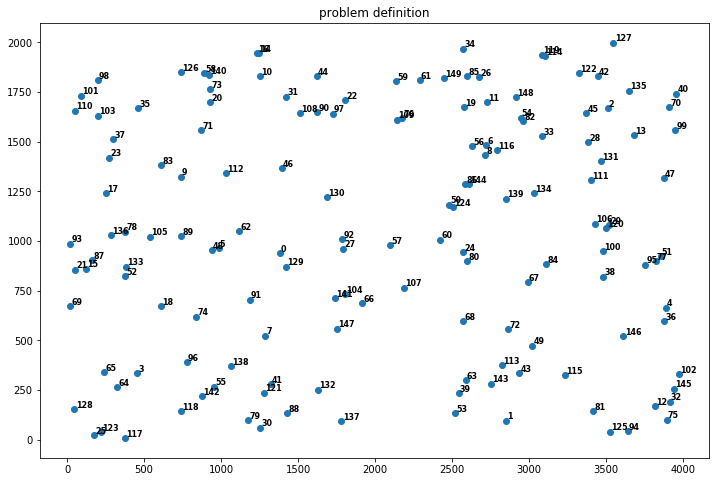

In [4]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('problem definition')

plt.show()

## Objective function

In [5]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

## SGA-PMX

In [13]:
sga_pmx = SGA(tsp_objective_function, chromosome_length=n, 
              mutation=reverse_sequence_mutation,
              replacement=mu_plus_lambda_replacement,
              genetic_operator=pmx)

In [14]:
best, best_chromosome = sga_pmx.evolve(population_size=50,
                                       number_of_iterations=2500,
                                       crossover_probability=0.95,
                                       mutation_probability=0.35)

  0     0.03051209 238466.80016752 249053.11238956 255046.59151213 4453.60195453
  1     0.05149174 235415.97267680 244632.29401255 250119.20569200 4045.50672915
  2     0.06988621 232448.57449252 240003.17751460 243605.56661117 2516.61571202
  3     0.08919549 226753.19785375 237069.20451151 239706.43223012 2717.28952296
  4     0.10907626 221066.18856527 233612.65135090 238027.00149061 4191.67511122
  5     0.12411833 215508.28166239 228396.21469725 234176.47246500 4402.26264516
  6     0.14161849 214876.98093166 223960.58440853 228824.02585826 3620.24383693
  7     0.15813947 214344.68013329 220969.07397958 225389.96401019 3235.22541270
  8     0.17652845 210682.07402800 218457.84042446 222139.41077033 2777.44836804
  9     0.19257784 206588.14540774 215683.44956721 219480.31327134 2944.49727541
 10     0.21129203 206588.14540774 212998.53065612 216558.43329363 2841.09854897
 11     0.23042154 202239.28437505 210950.25971476 214344.68013329 2811.28534069
 12     0.24590015 199812.26

110     1.48887634 119629.20244730 120424.20769077 121036.20973771 342.66906794
111     1.50222683 119396.32150403 120168.35399854 120460.02256536 247.52146090
112     1.51336622 119396.32150403 119923.03864222 120281.66797135 254.72581710
113     1.52500629 118030.56756830 119613.50064192 120077.35137621 346.91346055
114     1.53733706 118030.56756830 119308.80271089 119674.45740975 411.71304829
115     1.54896235 117504.33717867 118790.28226001 119396.32150403 631.48068568
116     1.55821872 116876.06362784 117992.89803865 118339.39601376 208.67622368
117     1.56794000 116871.68443336 117888.58473785 118030.56756830 294.77191847
118     1.57765508 116349.83323822 117315.26785611 118030.56756830 526.42293628
119     1.58608532 115711.22084323 116696.99694853 117101.44321220 354.33072624
120     1.59528255 114206.06701403 116068.02450327 116876.06362784 601.07582707
121     1.60604620 114206.06701403 115413.95649548 115896.23560151 392.58262852
122     1.61672854 113843.29628230 11488

227     2.71130395 76975.36161008 77019.98130937 77126.08065518  66.31610788
228     2.71910262 76948.15139151 76976.29742918 76976.97033124   4.03894882
229     2.72733021 76753.80078812 76960.11341588 76976.97033124  32.60491907
230     2.73517776 76662.40363625 76915.06647981 76948.15139151  76.33338060
231     2.74331188 76662.40363625 76807.00809299 76948.15139151  88.76011643
232     2.75110126 76662.40363625 76750.14490205 76753.80078812  17.91011088
233     2.75865650 76566.03800269 76678.71390600 76753.80078812  41.33165093
234     2.76561856 76537.83679313 76653.84444951 76662.40363625  27.03684106
235     2.77795458 76236.50275147 76603.94712146 76662.40363625  71.84787783
236     2.79171276 76236.50275147 76542.36263712 76662.40363625  94.87005125
237     2.80234766 76236.50275147 76481.30364407 76566.03800269 120.85955681
238     2.81263304 76210.91135998 76342.84143821 76537.83679313 129.17132831
239     2.82145452 75773.17823626 76231.64862204 76266.24197329  67.46724059

343     3.74032617 60987.71439856 61428.02130925 61459.50461080  68.20553750
344     3.75601625 60987.71439856 61348.20835769 61459.50461080 147.47052158
345     3.77034187 60987.71439856 61219.07584156 61398.46611421 197.64093483
346     3.77945971 60761.32358963 60983.18658239 60987.71439856  31.69471325
347     3.78721571 60675.18703510 60818.43358443 60987.71439856 101.05744854
348     3.79585052 60675.18703510 60759.54308968 60761.32358963  12.05418481
349     3.80350518 60675.18703510 60704.38681035 60761.32358963  40.68417737
350     3.81135869 60609.77698010 60672.70441269 60675.18703510  12.18069632
351     3.82601357 60602.70699315 60655.82395822 60675.18703510  29.63600448
352     3.83532357 60602.70699315 60627.16207390 60675.18703510  28.60996824
353     3.84842014 60602.70699315 60609.06998140 60609.77698010   2.12099608
354     3.85612082 59654.92109724 60585.58947184 60609.77698010 132.98852800
355     3.86730647 59654.92109724 60090.90260936 60602.70699315 472.37405639

468     4.75991964 50946.53328715 51385.17791661 51394.12984783  62.66351849
469     4.76761341 50808.08598410 51069.09137808 51394.12984783 203.61438598
470     4.77513385 50801.14612714 50935.61351381 50946.53328715  37.09826481
471     4.78303814 50801.14612714 50850.72946510 50946.53328715  63.04969507
472     4.79114890 50801.14612714 50805.88244364 50822.82638619   4.10221644
473     4.79906130 50801.14612714 50804.19966421 50808.08598410   3.44485440
474     4.80648589 50801.14612714 50801.14612714 50801.14612714   0.00000000
475     4.81419873 50801.14612714 50801.14612714 50801.14612714   0.00000000
476     4.82181430 50517.16114236 50795.46642745 50801.14612714  39.75789787
477     4.82947564 50517.16114236 50613.87780685 50801.14612714 134.41478944
478     4.83757973 50517.16114236 50517.16114236 50517.16114236   0.00000000
479     4.84524560 50323.62592271 50512.51531007 50517.16114236  27.52408091
480     4.85299540 50323.62592271 50411.56684313 50517.16114236  90.34832626

599     5.78806567 44687.37992225 44687.37992225 44687.37992225   0.00000000
600     5.79604197 44687.37992225 44687.37992225 44687.37992225   0.00000000
601     5.80347347 44684.86569521 44687.32963771 44687.37992225   0.35199178
602     5.81094337 44684.86569521 44685.67024786 44687.37992225   1.17282695
603     5.81849718 44684.86569521 44684.86569521 44684.86569521   0.00000000
604     5.82633829 44674.83802386 44684.66514179 44684.86569521   1.40387399
605     5.83358765 44674.83802386 44679.04964583 44684.86569521   4.94924250
606     5.84132504 44412.44866921 44669.59023677 44674.83802386  36.73450965
607     5.84901619 44412.44866921 44504.67125899 44674.83802386 123.92110746
608     5.85635400 44412.44866921 44412.44866921 44412.44866921   0.00000000
609     5.86405110 44412.44866921 44412.44866921 44412.44866921   0.00000000
610     5.87161446 44412.44866921 44412.44866921 44412.44866921   0.00000000
611     5.87915707 44220.92905819 44408.61827699 44412.44866921  26.81274554

706     6.60998607 40725.54412423 40725.54412423 40725.54412423   0.00000000
707     6.61858273 40239.52568507 40715.46015701 40725.54412423  68.03824116
708     6.62673259 40239.52568507 40410.67987386 40725.54412423 229.43136990
709     6.63446808 40239.52568507 40239.52568507 40239.52568507   0.00000000
710     6.64213991 40239.52568507 40239.52568507 40239.52568507   0.00000000
711     6.64949226 40239.52568507 40239.52568507 40239.52568507   0.00000000
712     6.65707731 40239.52568507 40239.52568507 40239.52568507   0.00000000
713     6.66452551 40156.63292750 40237.86782992 40239.52568507  11.60498606
714     6.67203236 40156.63292750 40184.81646507 40239.52568507  39.26702634
715     6.67979312 40156.63292750 40156.63292750 40156.63292750   0.00000000
716     6.68706036 40156.63292750 40156.63292750 40156.63292750   0.00000000
717     6.69501066 40156.63292750 40156.63292750 40156.63292750   0.00000000
718     6.70274401 40156.63292750 40156.63292750 40156.63292750   0.00000000

814     7.43777370 39167.90502764 39167.90502764 39167.90502764   0.00000000
815     7.44535017 39167.90502764 39167.90502764 39167.90502764   0.00000000
816     7.45346212 39167.90502764 39167.90502764 39167.90502764   0.00000000
817     7.46121025 39167.90502764 39167.90502764 39167.90502764   0.00000000
818     7.46874928 39167.90502764 39167.90502764 39167.90502764   0.00000000
819     7.47680140 39167.90502764 39167.90502764 39167.90502764   0.00000000
820     7.48399830 39167.90502764 39167.90502764 39167.90502764   0.00000000
821     7.49148607 39167.90502764 39167.90502764 39167.90502764   0.00000000
822     7.49920821 39167.90502764 39167.90502764 39167.90502764   0.00000000
823     7.50662041 39167.90502764 39167.90502764 39167.90502764   0.00000000
824     7.51434898 39167.90502764 39167.90502764 39167.90502764   0.00000000
825     7.52214432 39167.90502764 39167.90502764 39167.90502764   0.00000000
826     7.52995586 39167.90502764 39167.90502764 39167.90502764   0.00000000

922     8.26511073 38204.09304938 38204.09304938 38204.09304938   0.00000000
923     8.27321315 38204.09304938 38204.09304938 38204.09304938   0.00000000
924     8.28095508 38204.09304938 38204.09304938 38204.09304938   0.00000000
925     8.28872657 38204.09304938 38204.09304938 38204.09304938   0.00000000
926     8.29663348 38204.09304938 38204.09304938 38204.09304938   0.00000000
927     8.30398297 38204.09304938 38204.09304938 38204.09304938   0.00000000
928     8.31081152 38204.09304938 38204.09304938 38204.09304938   0.00000000
929     8.31834674 38204.09304938 38204.09304938 38204.09304938   0.00000000
930     8.32572889 38204.09304938 38204.09304938 38204.09304938   0.00000000
931     8.33318424 38204.09304938 38204.09304938 38204.09304938   0.00000000
932     8.34054351 38204.09304938 38204.09304938 38204.09304938   0.00000000
933     8.34811711 38204.09304938 38204.09304938 38204.09304938   0.00000000
934     8.35592604 38204.09304938 38204.09304938 38204.09304938   0.00000000

1030     9.08794832 37387.44730816 37387.44730816 37387.44730816   0.00000000
1031     9.09570622 37387.44730816 37387.44730816 37387.44730816   0.00000000
1032     9.10360765 37387.44730816 37387.44730816 37387.44730816   0.00000000
1033     9.11144161 37387.44730816 37387.44730816 37387.44730816   0.00000000
1034     9.11919188 37387.44730816 37387.44730816 37387.44730816   0.00000000
1035     9.12681794 37387.44730816 37387.44730816 37387.44730816   0.00000000
1036     9.13442755 37387.44730816 37387.44730816 37387.44730816   0.00000000
1037     9.14169836 37387.44730816 37387.44730816 37387.44730816   0.00000000
1038     9.14938593 37387.44730816 37387.44730816 37387.44730816   0.00000000
1039     9.15699291 37387.44730816 37387.44730816 37387.44730816   0.00000000
1040     9.16413403 37387.44730816 37387.44730816 37387.44730816   0.00000000
1041     9.17162752 37387.44730816 37387.44730816 37387.44730816   0.00000000
1042     9.17874169 37387.44730816 37387.44730816 37387.44730816

1138     9.91163325 36447.86855891 36447.86855891 36447.86855891   0.00000000
1139     9.91997671 36447.86855891 36447.86855891 36447.86855891   0.00000000
1140     9.92789268 36447.86855891 36447.86855891 36447.86855891   0.00000000
1141     9.93575549 36447.86855891 36447.86855891 36447.86855891   0.00000000
1142     9.94321990 36447.86855891 36447.86855891 36447.86855891   0.00000000
1143     9.95069599 36447.86855891 36447.86855891 36447.86855891   0.00000000
1144     9.95819020 36447.86855891 36447.86855891 36447.86855891   0.00000000
1145     9.96564341 36309.92969547 36445.10978164 36447.86855891  19.31144088
1146     9.97338700 36309.92969547 36365.10524085 36447.86855891  67.57596623
1147     9.98070765 36309.92969547 36309.92969547 36309.92969547   0.00000000
1148     9.98858786 36309.92969547 36309.92969547 36309.92969547   0.00000000
1149     9.99611378 36309.92969547 36309.92969547 36309.92969547   0.00000000
1150    10.00372291 36309.92969547 36309.92969547 36309.92969547

1246    10.73576689 34794.90363853 34794.90363853 34794.90363853   0.00000000
1247    10.74367714 34794.90363853 34794.90363853 34794.90363853   0.00000000
1248    10.75183010 34794.90363853 34794.90363853 34794.90363853   0.00000000
1249    10.75927496 34794.90363853 34794.90363853 34794.90363853   0.00000000
1250    10.76682377 34794.90363853 34794.90363853 34794.90363853   0.00000000
1251    10.77436781 34794.90363853 34794.90363853 34794.90363853   0.00000000
1252    10.78192282 34543.96161070 34789.88479797 34794.90363853  35.13188390
1253    10.78934646 34543.96161070 34614.22537849 34794.90363853 112.67269105
1254    10.79686880 34543.96161070 34543.96161070 34543.96161070   0.00000000
1255    10.80449247 34543.96161070 34543.96161070 34543.96161070   0.00000000
1256    10.81217742 34543.96161070 34543.96161070 34543.96161070   0.00000000
1257    10.82012153 34543.96161070 34543.96161070 34543.96161070   0.00000000
1258    10.82839417 34543.96161070 34543.96161070 34543.96161070

1354    11.56503105 33774.50641905 33774.50641905 33774.50641905   0.00000000
1355    11.57312751 33746.50637424 33773.94641815 33774.50641905   3.92000627
1356    11.58092999 33746.50637424 33753.78638589 33774.50641905  12.28177849
1357    11.58806038 33746.50637424 33746.50637424 33746.50637424   0.00000000
1358    11.59523964 33746.50637424 33746.50637424 33746.50637424   0.00000000
1359    11.60305238 33746.50637424 33746.50637424 33746.50637424   0.00000000
1360    11.61045790 33746.50637424 33746.50637424 33746.50637424   0.00000000
1361    11.61791897 33746.50637424 33746.50637424 33746.50637424   0.00000000
1362    11.62563372 33746.50637424 33746.50637424 33746.50637424   0.00000000
1363    11.63323760 33746.50637424 33746.50637424 33746.50637424   0.00000000
1364    11.64091253 33746.50637424 33746.50637424 33746.50637424   0.00000000
1365    11.64854884 33746.50637424 33746.50637424 33746.50637424   0.00000000
1366    11.65597558 33746.50637424 33746.50637424 33746.50637424

1461    12.37966561 32796.22475005 32796.22475005 32796.22475005   0.00000000
1462    12.38738155 32796.22475005 32796.22475005 32796.22475005   0.00000000
1463    12.39494681 32748.57377382 32795.27173053 32796.22475005   6.67113667
1464    12.40264034 32748.57377382 32763.82208621 32796.22475005  22.22804401
1465    12.41023088 32748.57377382 32748.57377382 32748.57377382   0.00000000
1466    12.41800499 32748.57377382 32748.57377382 32748.57377382   0.00000000
1467    12.42563033 32704.89802501 32747.70025884 32748.57377382   6.11460483
1468    12.43344259 32704.89802501 32719.74777960 32748.57377382  20.68958530
1469    12.44063354 32704.89802501 32704.89802501 32704.89802501   0.00000000
1470    12.44819188 32704.89802501 32704.89802501 32704.89802501   0.00000000
1471    12.45618773 32704.89802501 32704.89802501 32704.89802501   0.00000000
1472    12.46404910 32704.89802501 32704.89802501 32704.89802501   0.00000000
1473    12.47191405 32704.89802501 32704.89802501 32704.89802501

1569    13.20620322 32451.91487834 32451.91487834 32451.91487834   0.00000000
1570    13.21383357 32451.91487834 32451.91487834 32451.91487834   0.00000000
1571    13.22146058 32451.91487834 32451.91487834 32451.91487834   0.00000000
1572    13.22934771 32451.91487834 32451.91487834 32451.91487834   0.00000000
1573    13.23706865 32451.91487834 32451.91487834 32451.91487834   0.00000000
1574    13.24455094 32451.91487834 32451.91487834 32451.91487834   0.00000000
1575    13.25239253 32341.40635104 32449.70470779 32451.91487834  15.47119382
1576    13.26030254 32341.40635104 32383.39959141 32451.91487834  53.63934110
1577    13.26795673 32286.24625549 32340.30314913 32341.40635104   7.72241338
1578    13.27570963 32286.24625549 32310.51669753 32341.40635104  27.38075136
1579    13.28350830 32286.24625549 32286.24625549 32286.24625549   0.00000000
1580    13.29110765 32286.24625549 32286.24625549 32286.24625549   0.00000000
1581    13.29889393 32286.24625549 32286.24625549 32286.24625549

1675    14.02106071 31639.19277863 31639.19277863 31639.19277863   0.00000000
1676    14.02867103 31639.19277863 31639.19277863 31639.19277863   0.00000000
1677    14.03604484 31639.19277863 31639.19277863 31639.19277863   0.00000000
1678    14.04384589 31639.19277863 31639.19277863 31639.19277863   0.00000000
1679    14.05153751 31639.19277863 31639.19277863 31639.19277863   0.00000000
1680    14.05947351 31639.19277863 31639.19277863 31639.19277863   0.00000000
1681    14.06679630 31639.19277863 31639.19277863 31639.19277863   0.00000000
1682    14.07428646 31639.19277863 31639.19277863 31639.19277863   0.00000000
1683    14.08166409 31639.19277863 31639.19277863 31639.19277863   0.00000000
1684    14.08903027 31639.19277863 31639.19277863 31639.19277863   0.00000000
1685    14.09675288 31639.19277863 31639.19277863 31639.19277863   0.00000000
1686    14.10410786 31639.19277863 31639.19277863 31639.19277863   0.00000000
1687    14.11187434 31639.19277863 31639.19277863 31639.19277863

1782    14.84006119 30985.12218836 30985.12218836 30985.12218836   0.00000000
1783    14.84844422 30985.12218836 30985.12218836 30985.12218836   0.00000000
1784    14.85585237 30985.12218836 30985.12218836 30985.12218836   0.00000000
1785    14.86327410 30985.12218836 30985.12218836 30985.12218836   0.00000000
1786    14.87112880 30985.12218836 30985.12218836 30985.12218836   0.00000000
1787    14.87893128 30985.12218836 30985.12218836 30985.12218836   0.00000000
1788    14.88675022 30985.12218836 30985.12218836 30985.12218836   0.00000000
1789    14.89442468 30985.12218836 30985.12218836 30985.12218836   0.00000000
1790    14.90202093 30985.12218836 30985.12218836 30985.12218836   0.00000000
1791    14.90960479 30985.12218836 30985.12218836 30985.12218836   0.00000000
1792    14.91720009 30985.12218836 30985.12218836 30985.12218836   0.00000000
1793    14.92460775 30985.12218836 30985.12218836 30985.12218836   0.00000000
1794    14.93264198 30985.12218836 30985.12218836 30985.12218836

1890    15.66779923 30873.34117662 30873.34117662 30873.34117662   0.00000000
1891    15.67565370 30873.34117662 30873.34117662 30873.34117662   0.00000000
1892    15.68344665 30873.34117662 30873.34117662 30873.34117662   0.00000000
1893    15.69078350 30873.34117662 30873.34117662 30873.34117662   0.00000000
1894    15.69832277 30873.34117662 30873.34117662 30873.34117662   0.00000000
1895    15.70599318 30873.34117662 30873.34117662 30873.34117662   0.00000000
1896    15.71377397 30873.34117662 30873.34117662 30873.34117662   0.00000000
1897    15.72136307 30873.34117662 30873.34117662 30873.34117662   0.00000000
1898    15.72906184 30873.34117662 30873.34117662 30873.34117662   0.00000000
1899    15.73682213 30873.34117662 30873.34117662 30873.34117662   0.00000000
1900    15.74445724 30873.34117662 30873.34117662 30873.34117662   0.00000000
1901    15.75198293 30873.34117662 30873.34117662 30873.34117662   0.00000000
1902    15.75945783 30873.34117662 30873.34117662 30873.34117662

1998    16.49227858 30730.62721198 30730.62721198 30730.62721198   0.00000000
1999    16.49956584 30730.62721198 30730.62721198 30730.62721198   0.00000000
2000    16.50739479 30730.62721198 30730.62721198 30730.62721198   0.00000000
2001    16.51502156 30730.62721198 30730.62721198 30730.62721198   0.00000000
2002    16.52228928 30730.62721198 30730.62721198 30730.62721198   0.00000000
2003    16.52981210 30730.62721198 30730.62721198 30730.62721198   0.00000000
2004    16.53719854 30730.62721198 30730.62721198 30730.62721198   0.00000000
2005    16.54484630 30730.62721198 30730.62721198 30730.62721198   0.00000000
2006    16.55252647 30663.43205182 30729.28330878 30730.62721198   9.40732242
2007    16.56003547 30663.43205182 30683.59059987 30730.62721198  30.79269077
2008    16.56795168 30663.43205182 30663.43205182 30663.43205182   0.00000000
2009    16.57539463 30663.43205182 30663.43205182 30663.43205182   0.00000000
2010    16.58300400 30663.43205182 30663.43205182 30663.43205182

2106    17.31305194 30460.64434380 30460.64434380 30460.64434380   0.00000000
2107    17.32056093 30460.64434380 30460.64434380 30460.64434380   0.00000000
2108    17.32815242 30460.64434380 30460.64434380 30460.64434380   0.00000000
2109    17.33586431 30460.64434380 30460.64434380 30460.64434380   0.00000000
2110    17.34363341 30460.64434380 30460.64434380 30460.64434380   0.00000000
2111    17.35163164 30460.64434380 30460.64434380 30460.64434380   0.00000000
2112    17.35927534 30460.64434380 30460.64434380 30460.64434380   0.00000000
2113    17.36699200 30460.64434380 30460.64434380 30460.64434380   0.00000000
2114    17.37478924 30460.64434380 30460.64434380 30460.64434380   0.00000000
2115    17.38242435 30460.64434380 30460.64434380 30460.64434380   0.00000000
2116    17.38989782 30460.64434380 30460.64434380 30460.64434380   0.00000000
2117    17.39764619 30460.64434380 30460.64434380 30460.64434380   0.00000000
2118    17.40572238 30460.64434380 30460.64434380 30460.64434380

2213    18.13050723 30434.45265068 30434.45265068 30434.45265068   0.00000000
2214    18.13945818 30434.45265068 30434.45265068 30434.45265068   0.00000000
2215    18.14735794 30434.45265068 30434.45265068 30434.45265068   0.00000000
2216    18.15561342 30434.45265068 30434.45265068 30434.45265068   0.00000000
2217    18.16343999 30434.45265068 30434.45265068 30434.45265068   0.00000000
2218    18.17091322 30434.45265068 30434.45265068 30434.45265068   0.00000000
2219    18.17846370 30434.45265068 30434.45265068 30434.45265068   0.00000000
2220    18.18589473 30434.45265068 30434.45265068 30434.45265068   0.00000000
2221    18.19358754 30434.45265068 30434.45265068 30434.45265068   0.00000000
2222    18.20110512 30434.45265068 30434.45265068 30434.45265068   0.00000000
2223    18.20879006 30434.45265068 30434.45265068 30434.45265068   0.00000000
2224    18.21594787 30434.45265068 30434.45265068 30434.45265068   0.00000000
2225    18.22352791 30434.45265068 30434.45265068 30434.45265068

2321    18.95593929 30353.36868286 30353.36868286 30353.36868286   0.00000000
2322    18.96443915 30353.36868286 30353.36868286 30353.36868286   0.00000000
2323    18.97247767 30353.36868286 30353.36868286 30353.36868286   0.00000000
2324    18.97993135 30353.36868286 30353.36868286 30353.36868286   0.00000000
2325    18.98799562 30353.36868286 30353.36868286 30353.36868286   0.00000000
2326    18.99519014 30353.36868286 30353.36868286 30353.36868286   0.00000000
2327    19.00286484 30353.36868286 30353.36868286 30353.36868286   0.00000000
2328    19.01020885 30353.36868286 30353.36868286 30353.36868286   0.00000000
2329    19.01775718 30353.36868286 30353.36868286 30353.36868286   0.00000000
2330    19.02539825 30353.36868286 30353.36868286 30353.36868286   0.00000000
2331    19.03313398 30353.36868286 30353.36868286 30353.36868286   0.00000000
2332    19.04056811 30353.36868286 30353.36868286 30353.36868286   0.00000000
2333    19.04790783 30353.36868286 30353.36868286 30353.36868286

2429    19.78042626 30121.86597606 30121.86597606 30121.86597606   0.00000000
2430    19.78788733 30121.86597606 30121.86597606 30121.86597606   0.00000000
2431    19.79562473 30121.86597606 30121.86597606 30121.86597606   0.00000000
2432    19.80296278 30121.86597606 30121.86597606 30121.86597606   0.00000000
2433    19.81049466 30121.86597606 30121.86597606 30121.86597606   0.00000000
2434    19.81795764 30121.86597606 30121.86597606 30121.86597606   0.00000000
2435    19.82541084 30121.86597606 30121.86597606 30121.86597606   0.00000000
2436    19.83252478 30121.86597606 30121.86597606 30121.86597606   0.00000000
2437    19.83990669 30121.86597606 30121.86597606 30121.86597606   0.00000000
2438    19.84741282 30121.86597606 30121.86597606 30121.86597606   0.00000000
2439    19.85508418 30121.86597606 30121.86597606 30121.86597606   0.00000000
2440    19.86255026 30121.86597606 30121.86597606 30121.86597606   0.00000000
2441    19.87006831 30121.86597606 30121.86597606 30121.86597606

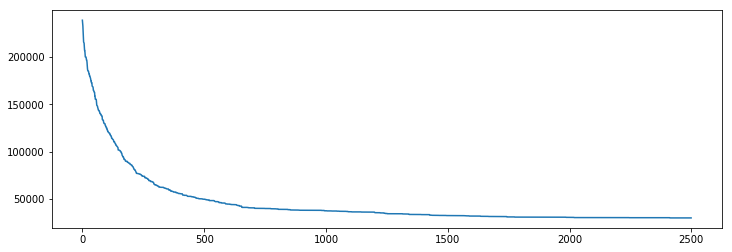

In [15]:
plt.figure(figsize=(12,4))
plt.plot(best)
plt.show()

In [186]:
best

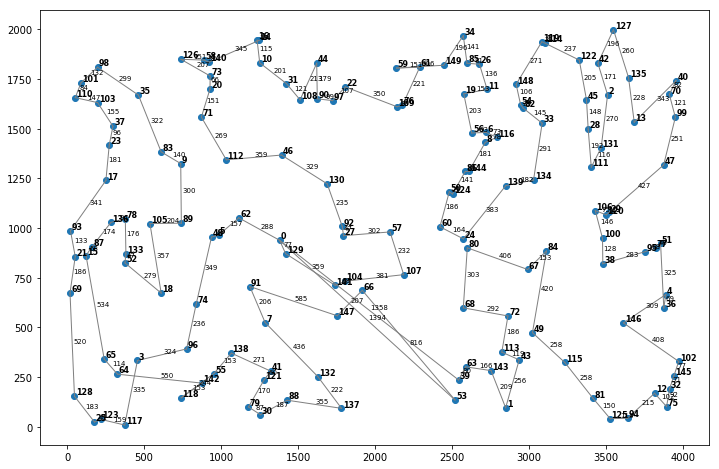

In [16]:
from matplotlib.lines import Line2D

route = best_chromosome
coords = coords.astype("int")

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})


plt.show()

In [25]:
coords[0, 0]

1150.0

In [29]:
route

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]])

In [35]:
best_chromosome

array([23, 12,  3,  9, 19,  1, 28,  2, 25,  8,  4, 20,  5, 11, 27,  0,  7,
       26, 22,  6, 24, 10, 21, 16, 13, 17, 14, 18, 15])

In [40]:
opt = np.array([1,
28,
6,
12,
9,
26,
3,
29,
5,
21,
2,
20,
10,
4,
15,
18,
14,
17,
22,
11,
19,
25,
7,
23,
8,
27,
16,
13,
24]) - 1

In [38]:
len(opt)

29

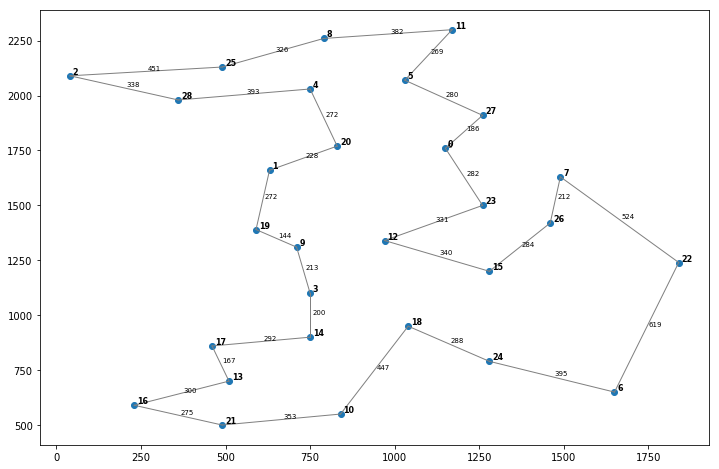

In [41]:
from matplotlib.lines import Line2D

route = opt
coords = coords.astype("int")

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})


plt.show()

In [42]:
tsp_objective_function(opt)

9074.1480478728427